In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitudes combinations.
# Creats lats and lngs and pair them by zipping them lat_lngs with the zip() function
lats = np.random.uniform(low =  -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

## Generate Random World Cities

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

## Get the City Weather Data

In [7]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87b7a71b915f2ad8471aa596f4425849


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval   
---------------------------


In [12]:
# Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count += 1
        time.sleep(60)
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 43 of Set 23 | ilulissat
Processing Record 44 of Set 23 | chagda
City not found. Skipping...
Processing Record 45 of Set 23 | tuktoyaktuk
Processing Record 46 of Set 23 | hamilton
Processing Record 47 of Set 23 | chernyshevskiy
Processing Record 48 of Set 23 | mataura
Processing Record 49 of Set 23 | dom pedrito
Processing Record 50 of Set 23 | kushmurun
Processing Record 51 of Set 23 | geraldton
Processing Record 52 of Set 23 | poum
Processing Record 53 of Set 23 | carnarvon
Processing Record 54 of Set 23 | east london
Processing Record 55 of Set 23 | saint-augustin
Processing Record 56 of Set 23 | albany
Processing Record 57 of Set 23 | mehamn
Processing Record 58 of Set 23 | hilo
Processing Record 59 of Set 23 | rikitea
Processing Record 60 of Set 23 | itambacuri
Processing Record 61 of Set 23 | khorinsk
Processing Record 62 of Set 23 | punta arenas
Processing Record 63 of Set 23 | hobyo
Processing Record 64 of Set 23 | tuatapere
Processing Record 65 of Set 23 | pe

Processing Record 37 of Set 26 | kodiak
Processing Record 38 of Set 26 | tay ninh
Processing Record 39 of Set 26 | manokwari
Processing Record 40 of Set 26 | chalmette
Processing Record 41 of Set 26 | gaoyou
Processing Record 42 of Set 26 | russell
Processing Record 43 of Set 26 | bangassou
Processing Record 44 of Set 26 | hithadhoo
Processing Record 45 of Set 26 | sompeta
Processing Record 46 of Set 26 | waverly
Processing Record 47 of Set 26 | dikson
Processing Record 48 of Set 26 | port alfred
Processing Record 49 of Set 26 | ozieri
Processing Record 50 of Set 26 | copperas cove
Processing Record 1 of Set 27 | puerto ayora
Processing Record 2 of Set 27 | lerwick
Processing Record 3 of Set 27 | saint-denis
Processing Record 4 of Set 27 | platanos
Processing Record 5 of Set 27 | codrington
Processing Record 6 of Set 27 | goure
Processing Record 7 of Set 27 | boende
Processing Record 8 of Set 27 | port blair
Processing Record 9 of Set 27 | port elizabeth
Processing Record 10 of Set 27 

City not found. Skipping...
Processing Record 23 of Set 30 | swan river
Processing Record 24 of Set 30 | san rafael del sur
Processing Record 25 of Set 30 | ponta do sol
Processing Record 26 of Set 30 | ust-omchug
Processing Record 27 of Set 30 | balgazyn
Processing Record 28 of Set 30 | khartoum
Processing Record 29 of Set 30 | henties bay
Processing Record 30 of Set 30 | olafsvik
Processing Record 31 of Set 30 | moa
Processing Record 32 of Set 30 | mao
Processing Record 33 of Set 30 | mamallapuram
Processing Record 34 of Set 30 | springdale
Processing Record 35 of Set 30 | daru
Processing Record 36 of Set 30 | karasburg
Processing Record 37 of Set 30 | grand gaube
Processing Record 38 of Set 30 | kyshtovka
Processing Record 39 of Set 30 | bandundu
Processing Record 40 of Set 30 | eureka
Processing Record 41 of Set 30 | elat
Processing Record 42 of Set 30 | atambua
Processing Record 43 of Set 30 | whitehorse
Processing Record 44 of Set 30 | massakory
Processing Record 45 of Set 30 | c

Processing Record 9 of Set 34 | del rio
Processing Record 10 of Set 34 | burnie
Processing Record 11 of Set 34 | nakonde
Processing Record 12 of Set 34 | urdzhar
City not found. Skipping...
Processing Record 13 of Set 34 | foam lake
Processing Record 14 of Set 34 | surab
Processing Record 15 of Set 34 | rovnoye
Processing Record 16 of Set 34 | fukue
Processing Record 17 of Set 34 | tianpeng
Processing Record 18 of Set 34 | nemuro
Processing Record 19 of Set 34 | kazalinsk
City not found. Skipping...
Processing Record 20 of Set 34 | new plymouth
Processing Record 21 of Set 34 | korem
Processing Record 22 of Set 34 | lexington
Processing Record 23 of Set 34 | araouane
Processing Record 24 of Set 34 | traverse city
Processing Record 25 of Set 34 | kasongo-lunda
Processing Record 26 of Set 34 | waddan
Processing Record 27 of Set 34 | aksarka
Processing Record 28 of Set 34 | samalaeulu
City not found. Skipping...
Processing Record 29 of Set 34 | asau
Processing Record 30 of Set 34 | wiscons

## Create a DataFrame of City Weather Data

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilulissat,69.2167,-51.1000,30.22,74,90,14.97,GL,2021-11-24 02:39:24
1,Tuktoyaktuk,69.4541,-133.0374,-5.80,77,75,4.61,CA,2021-11-24 02:39:24
2,Hamilton,39.1834,-84.5333,35.78,67,1,0.00,US,2021-11-24 02:36:46
3,Chernyshevskiy,63.0128,112.4714,-8.00,87,100,3.74,RU,2021-11-24 02:39:25
4,Mataura,-46.1927,168.8643,63.54,46,100,6.73,NZ,2021-11-24 02:39:26
5,Dom Pedrito,-30.9828,-54.6731,57.51,63,2,6.80,BR,2021-11-24 02:39:26
6,Kushmurun,52.4503,64.6311,16.02,91,100,6.40,KZ,2021-11-24 02:39:26
7,Geraldton,-28.7667,114.6000,90.01,15,0,12.66,AU,2021-11-24 02:39:27
8,Poum,-20.2333,164.0167,78.89,78,100,5.77,NC,2021-11-24 02:39:28
9,Carnarvon,-24.8667,113.6333,95.07,18,0,16.11,AU,2021-11-24 02:39:29


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2021-11-24 02:39:24,69.2167,-51.1000,30.22,74,90,14.97
1,Tuktoyaktuk,CA,2021-11-24 02:39:24,69.4541,-133.0374,-5.80,77,75,4.61
2,Hamilton,US,2021-11-24 02:36:46,39.1834,-84.5333,35.78,67,1,0.00
3,Chernyshevskiy,RU,2021-11-24 02:39:25,63.0128,112.4714,-8.00,87,100,3.74
4,Mataura,NZ,2021-11-24 02:39:26,-46.1927,168.8643,63.54,46,100,6.73
5,Dom Pedrito,BR,2021-11-24 02:39:26,-30.9828,-54.6731,57.51,63,2,6.80
6,Kushmurun,KZ,2021-11-24 02:39:26,52.4503,64.6311,16.02,91,100,6.40
7,Geraldton,AU,2021-11-24 02:39:27,-28.7667,114.6000,90.01,15,0,12.66
8,Poum,NC,2021-11-24 02:39:28,-20.2333,164.0167,78.89,78,100,5.77
9,Carnarvon,AU,2021-11-24 02:39:29,-24.8667,113.6333,95.07,18,0,16.11


In [20]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

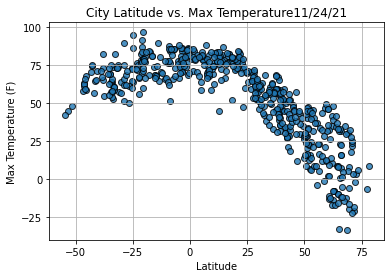

In [23]:
# Imprt time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
from matplotlib import style
style.use('fivethirtyeight')
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

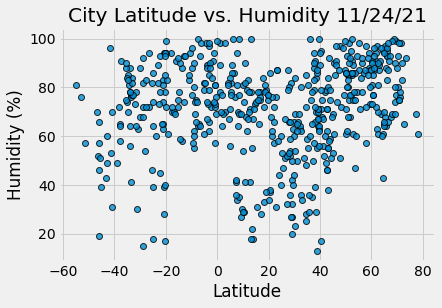

In [25]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           humidity,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
from matplotlib import style
style.use('fivethirtyeight')
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

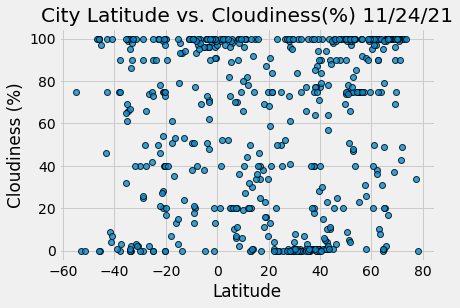

In [26]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           cloudiness,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
from matplotlib import style
style.use('fivethirtyeight')
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

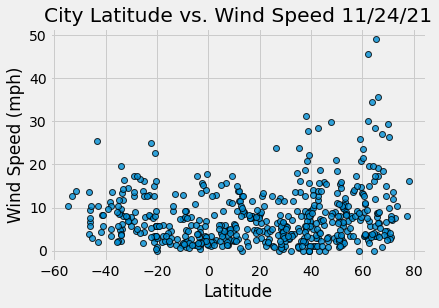

In [27]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           wind_speed,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
from matplotlib import style
style.use('fivethirtyeight')
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()

In [80]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [81]:
index13 = city_data_df.loc[13]
index13

City                       Mehamn
Country                        NO
Date          2021-11-24 02:39:30
Lat                       71.0357
Lng                       27.8492
Max Temp                    22.19
Humidity                       76
Cloudiness                    100
Wind Speed                   3.09
Name: 13, dtype: object

In [82]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
536    False
537     True
538    False
539     True
540     True
Name: Lat, Length: 541, dtype: bool

In [83]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2021-11-24 02:39:24,69.2167,-51.1000,30.22,74,90,14.97
1,Tuktoyaktuk,CA,2021-11-24 02:39:24,69.4541,-133.0374,-5.80,77,75,4.61
2,Hamilton,US,2021-11-24 02:36:46,39.1834,-84.5333,35.78,67,1,0.00
3,Chernyshevskiy,RU,2021-11-24 02:39:25,63.0128,112.4714,-8.00,87,100,3.74
6,Kushmurun,KZ,2021-11-24 02:39:26,52.4503,64.6311,16.02,91,100,6.40
...,...,...,...,...,...,...,...,...,...
532,Travesia,HN,2021-11-24 02:54:15,15.8667,-87.9000,76.14,75,40,8.21
535,Naklo Nad Notecia,PL,2021-11-24 02:54:16,53.1421,17.6018,43.45,78,100,12.19
537,Bay Roberts,CA,2021-11-24 02:53:38,47.5999,-53.2648,45.03,87,100,8.01
539,Rudbar,AF,2021-11-24 02:54:18,30.1500,62.6000,61.36,23,1,5.10


In [84]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

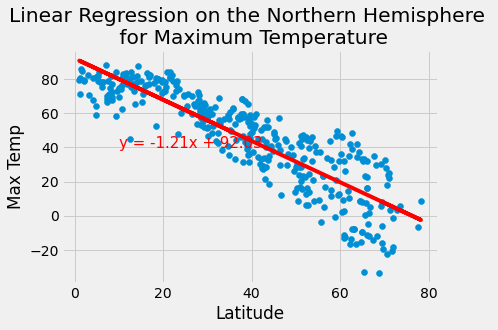

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))


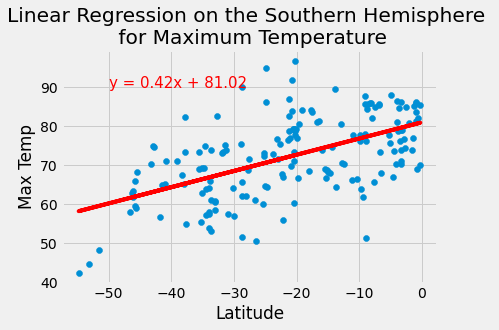

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))


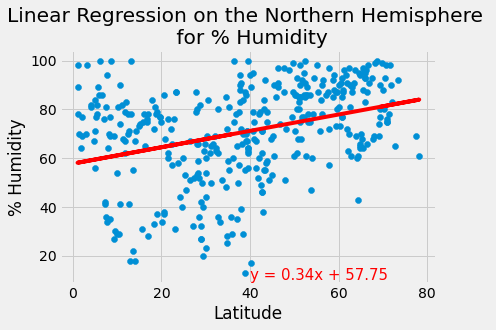

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

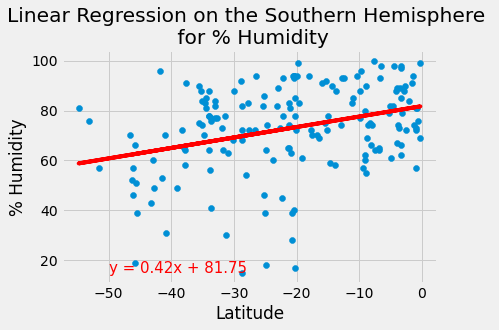

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

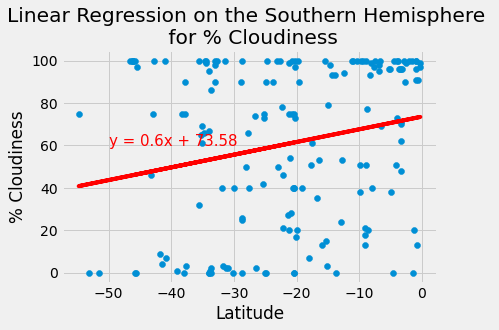

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

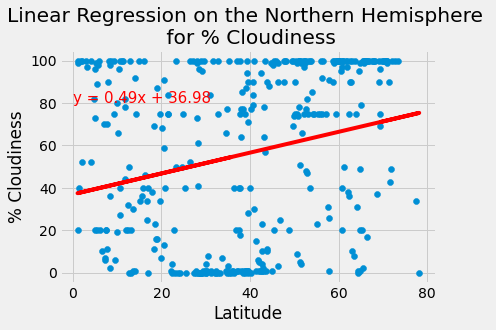

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(0,80))

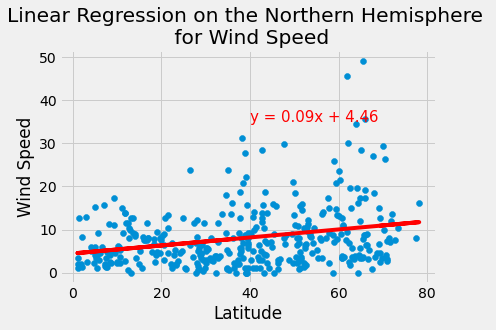

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))


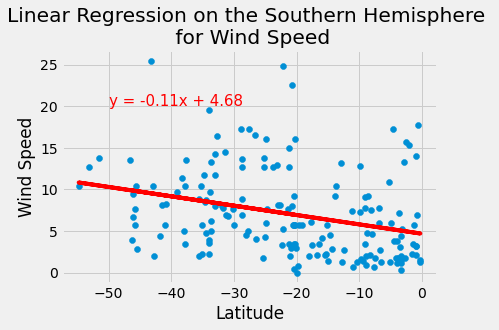

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',  
                       'Wind Speed',(-50,20))